## K-Means Clustering
1. Choose the number of clusters <br>
2. Specify the cluster seeds. A seed is a starting centroid. <br>
3. Assign each point to a centroid <br>
4. Adjust the centroid <br>


## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Load data

In [2]:
data = pd.read_csv('3.01. Country clusters.csv')
data

Country  Latitude  Longitude Language
0        USA     44.97    -103.77  English
1     Canada     62.40     -96.80  English
2     France     46.75       2.40   French
3         UK     54.01      -2.53  English
4    Germany     51.15      10.40   German
5  Australia    -25.45     133.11  English

## Plot the data

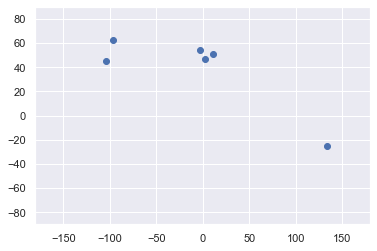

In [3]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Select the features

In [4]:
# DataFrame.iloc[row indices,column indices]slices the data frame, given rows and columns to be kept
x = data.iloc[:, 1:3]
x

Latitude  Longitude
0     44.97    -103.77
1     62.40     -96.80
2     46.75       2.40
3     54.01      -2.53
4     51.15      10.40
5    -25.45     133.11

## Clustering

In [17]:
kmeans = KMeans(3)

In [18]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [19]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 0, 0, 2])

In [20]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

Country  Latitude  Longitude Language  Cluster
0        USA     44.97    -103.77  English        1
1     Canada     62.40     -96.80  English        1
2     France     46.75       2.40   French        0
3         UK     54.01      -2.53  English        0
4    Germany     51.15      10.40   German        0
5  Australia    -25.45     133.11  English        2

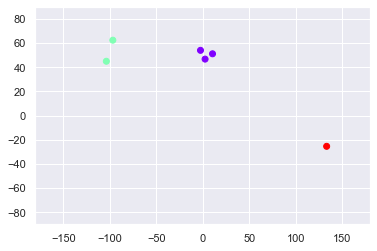

In [21]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selecting the number of clusters
The elbow method.

### WCSS - Within-Cluster Sum of Squares

In [22]:
kmeans.inertia_

288.1052333333333